In [ ]:
#connect to google drive: CLICK THE LINK GENERATED AND login to google sccount for where to start working AND COPY + PASTE the authoriization code 
!pip install gshell
!gshell init

# Setup
# **Make sure to read the instructions carefully!**

***upload & rename*** blender file ( *particles.blend* ) to google drive. make a folder ***blenderoutput*** in google drive for storage of the outputs directly
___
* `blender_version` : Version of blender used to render the scene.
* `blend_file_id` : Google drive file url `https://drive.google.com/file/d/14rU-w4UwEkRoslf6zGqFceu5ade7AU_O/view?usp=sharing ` use ***14rU-w4UwEkRoslf6zGqFceu5ade7AU_O*** as *file_id*

* `start_frame, end_frame` : Specify the start and end frame for animation. You may put same value such as 5 or 6 for both input to set the default *frame 5* or *frame 6* in the blend file.

* `output_directory_id` : Google drive folder url `https://drive.google.com/drive/u/0/folders/1ph2v7i3Qm8U6KVPh1DEJ1UCXRKVMYEY0 ` use ***1ph2v7i3Qm8U6KVPh1DEJ1UCXRKVMYEY0*** as *directory_id*

___
* `gpu_enabled, cpu_enabled` : Toggle GPU and CPU for rendering. CPU might give a slight boost in rendering time but may varies depend on the project.
___
* `blend_file_path` : `'/content/particles.blend'` keep as `'/content/ABC.blend'` put ABC as your blender file name. e.g. if file name is cat.blend >>> `'/content/cat.blend'`


* `temp_output_path` : = `'/content/out'` **NO CHANGES REQUIRED**
* `output_name` : `blender-####` **NO CHANGES REQUIRED**


After you are done, go to Runtime > Run All (Ctrl + F9) . See the [GitHub repo](https://github.com/1kaiser/blender-colab) for more info.

In [24]:
blender_version = '3.0.1' #@param ['2.79b', '2.80rc3', '2.81a', '2.82a', '2.83.18', '2.90.1', '2.91.2', '2.92.0', '2.93.6', '3.0.0', '3.0.1'] {allow-input: false}
blend_file_id = '14rU-w4UwEkRoslf6zGqFceu5ade7AU_O' #@param {type: 'string'}
start_frame =  1#@param {type: 'integer'}
end_frame =  7#@param {type: 'integer'}
output_directory_id = '1ph2v7i3Qm8U6KVPh1DEJ1UCXRKVMYEY0' #@param ['xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'] {allow-input: true}
#@markdown ---
gpu_enabled = True #@param {type:"boolean"}
cpu_enabled = True #@param {type:"boolean"}
#@markdown ---
blend_file_path = '/content/particles.blend' #@param {type: 'string'}
temp_output_path = '/content/out' #@param {type: 'string'}
output_name = 'blender-####' #@param {type: 'string'}
#@markdown ---
addon_file_id = '1smlyWDW1TmXmJIU6d50bfr86UmCzrZuu' #@param {type: 'string'}
addon_path = '/content/flip_fluids_addon.zip' #@param {type: 'string'}



In [15]:
import os
blender_url_dict = {'2.79b'   : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.79/blender-2.79b-linux-glibc219-x86_64.tar.bz2",
                    '2.80rc3' : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.80/blender-2.80rc3-linux-glibc217-x86_64.tar.bz2",
                    '2.81a'   : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.81/blender-2.81a-linux-glibc217-x86_64.tar.bz2",
                    '2.82a'   : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.82/blender-2.82a-linux64.tar.xz",
                    '2.83.18' : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.83/blender-2.83.18-linux-x64.tar.xz",
                    '2.90.1'  : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.90/blender-2.90.1-linux64.tar.xz",
                    '2.91.2'  : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.91/blender-2.91.2-linux64.tar.xz",
                    '2.92.0'  : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.92/blender-2.92.0-linux64.tar.xz",
                    '2.93.6'  : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender2.93/blender-2.93.6-linux-x64.tar.xz",
                    '3.0.0'   : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender3.0/blender-3.0.0-linux-x64.tar.xz",
                    '3.0.1'   : "https://ftp.nluug.nl/pub/graphics/blender/release/Blender3.0/blender-3.0.1-linux-x64.tar.xz"}

blender_url = blender_url_dict[blender_version]
base_url = os.path.basename(blender_url)

!mkdir $blender_version
!wget -nc $blender_url
!tar -xkf $base_url -C ./$blender_version --strip-components=1

--2022-02-24 08:51:42--  https://ftp.nluug.nl/pub/graphics/blender/release/Blender3.0/blender-3.0.1-linux-x64.tar.xz
Resolving ftp.nluug.nl (ftp.nluug.nl)... 145.220.21.40, 2001:67c:6ec:221:145:220:21:40
Connecting to ftp.nluug.nl (ftp.nluug.nl)|145.220.21.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186027304 (177M) [application/x-tar]
Saving to: ‘blender-3.0.1-linux-x64.tar.xz’

blender-3.0.1-linux 100%[===================>] 177.41M  30.1MB/s    in 9.6s    

2022-02-24 08:51:52 (18.5 MB/s) - ‘blender-3.0.1-linux-x64.tar.xz’ saved [186027304/186027304]



In [21]:
!gshell download -i '{addon_file_id}'


Downloaded 1smlyWDW1TmXmJIU6d50bfr86UmCzrZuu at 26.5 MB/s, total 26.5 MB


In [39]:
# Enable add on (or add custom properties here)
data = "import bpy\n"+\
    "bpy.ops.preferences.addon_install(overwrite=True, filepath="+'"'+addon_path+'"'+")\n"
with open('addon.py', 'w') as f:
    f.write(data)

In [37]:

blend_file_path = '/content/untitled.blend' #@param {type: 'string'}
temp_output_path = '/content/out' #@param {type: 'string'}
output_name = 'blender-####' #@param {type: 'string'}
#@markdown ---
frame =5
if not temp_output_path.endswith('/'):
    temp_output_path += '/'
    
output_path = temp_output_path + output_name


In [ ]:
  !sudo ./$blender_version/blender -b '{blend_file_path}' -P addon.py -E CYCLES -o '{output_path}' -noaudio -f $frame


Blender 3.0.1 (hash dc2d18018171 built 2022-01-26 00:40:57)
Read blend: /content/untitled.blend
addon_utils.disable: flip_fluids_addon not disabled
Modules Installed (flip_fluids_addon) from '/content/flip_fluids_addon.zip' into '/root/.config/blender/3.0/scripts/addons'
Info: Modules Installed (flip_fluids_addon) from '/content/flip_fluids_addon.zip' into '/root/.config/blender/3.0/scripts/addons'
Info: Modules Installed (flip_fluids_addon) from '/content/flip_fluids_addon.zip' into '/root/.config/blender/3.0/scripts/addons'
Fra:5 Mem:54.03M (Peak 55.05M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | fluid_surface
Fra:5 Mem:54.03M (Peak 55.05M) | Time:00:00.03 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Cube.001
Fra:5 Mem:62.19M (Peak 63.52M) | Time:00:00.07 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:5 Mem:41.11M (Peak 63.52M) | Time:00:00.07 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render

In [ ]:
# Enable add on (or add custom properties here)
data = "import bpy\n"+\
    "bpy.ops.wm.addon_install(overwrite=True, filepath="+addon_path+")\n"+\
    "bpy.ops.wm.addon_enable(module="")\n"
with open('addon.py', 'w') as f:
    f.write(data)

In [28]:
# Enable GPU rendering (or add custom properties here)
data = "import re\n"+\
    "import bpy\n"+\
    "scene = bpy.context.scene\n"+\
    "scene.cycles.device = 'GPU'\n"+\
    "prefs = bpy.context.preferences\n"+\
    "prefs.addons['cycles'].preferences.get_devices()\n"+\
    "cprefs = prefs.addons['cycles'].preferences\n"+\
    "print(cprefs)\n"+\
    "for compute_device_type in ('CUDA', 'OPENCL', 'NONE'):\n"+\
    "    try:\n"+\
    "        cprefs.compute_device_type = compute_device_type\n"+\
    "        print('Device found:',compute_device_type)\n"+\
    "        break\n"+\
    "    except TypeError:\n"+\
    "        pass\n"+\
    "for device in cprefs.devices:\n"+\
    "    if not re.match('intel', device.name, re.I):\n"+\
    "        print('Activating',device)\n"+\
    "        device.use = "+str(gpu_enabled)+"\n"+\
    "    else:\n"+\
    "        device.use = "+str(cpu_enabled)+"\n"+\
    "bpy.ops.wm.addon_install(overwrite=True, filepath="+addon_path+")\n"+\
    "bpy.ops.wm.addon_enable(module="++")\n"
with open('setgpu.py', 'w') as f:
    f.write(data)

TypeError: ignored

In [ ]:
!nvidia-smi

Mon Feb 21 11:39:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!gshell cd --with-id '{output_directory_id}'
!mkdir -p '{temp_output_path}'
!gshell download -i '{blend_file_id}'
!gshell download -i '{addon_file_id}'

if not temp_output_path.endswith('/'):
    temp_output_path += '/'
    
output_path = temp_output_path + output_name

nooffiles=''

frame = start_frame - 1
while frame < end_frame  :
  nooffiles = !gshell ls
  frame = len(nooffiles) + 1
  !sudo ./$blender_version/blender -b '{blend_file_path}' -P setgpu.py -E CYCLES -o '{output_path}' -noaudio -f $frame
  !gshell upload --parent '{output_directory_id}' --recursive '{temp_output_path}'/*
  !rm -r '{temp_output_path}'/*

File 'particles.blend' already exists, use --force to overwrite or --skip to skip
Blender 3.0.1 (hash dc2d18018171 built 2022-01-26 00:40:57)
Read blend: /content/particles.blend
add_node_handle_relation(Armature Modifier) - Could not find op_from (ComponentKey(OBPlane.003, EVAL_POSE))
add_node_handle_relation(Armature Modifier) - Could not find op_from (ComponentKey(OBPlane.003, EVAL_POSE))
add_node_handle_relation(Armature Modifier) - Could not find op_from (ComponentKey(OBPlane.003, EVAL_POSE))
add_node_handle_relation(Armature Modifier) - Could not find op_from (ComponentKey(OBPlane.003, EVAL_POSE))
<bpy_struct, CyclesPreferences at 0x7f8c1e82f388>
Device found: CUDA
Activating <bpy_struct, CyclesDeviceSettings("Tesla T4") at 0x7f8c1ead5a88>
Activating <bpy_struct, CyclesDeviceSettings("Tesla T4") at 0x7f8c1ead5b98>
add_node_handle_relation(Armature Modifier) - Could not find op_from (ComponentKey(OBPlane.003, EVAL_POSE))
add_node_handle_relation(Armature Modifier) - Could not find


# WORKING PROCESS
```
#set working directory
!gshell cd --with-id '{output_directory_id}'
#make temp output directory
!mkdir -p '{temp_output_path}'
#blend file downloaad from google drive
!gshell download -i '{blend_file_id}'

if not temp_output_path.endswith('/'):
    temp_output_path += '/'
# concatenating /content/out + blender-#### >>  /content/out/blender-#### to be used in blender output
output_path = temp_output_path + output_name
#initiating as previously processed files in directory as none (not exactly) as  later while using "gshell ls" would put out list of files as ['a.txt','b.txt',...] then doing len(files) as finding length would give no of files, which is to keep count of files processed and uploaded
nooffiles=''

#for generating each frame and uploading them frames are to be formatted as blender-0001.png, blender-0002.png, ...
frame = start_frame - 1
while frame < end_frame  :
  #CHECKING FOR THE NUM BER OF FILES IN GOOGLE DRIVE FOLDER
  nooffiles = !gshell ls
  frame = len(nooffiles) + 1
  #RUNNING BLENDER FOR THE SINGLE FRAME
  !sudo ./$blender_version/blender -b '{blend_file_path}' -P setgpu.py -E CYCLES -o '{output_path}' -noaudio -f $frame
  #uploading to destination from source
  !gshell upload --parent '{output_directory_id}' --recursive '{temp_output_path}'/*
  #emptying source (temporary directory)
  !rm -r '{temp_output_path}'/*
```
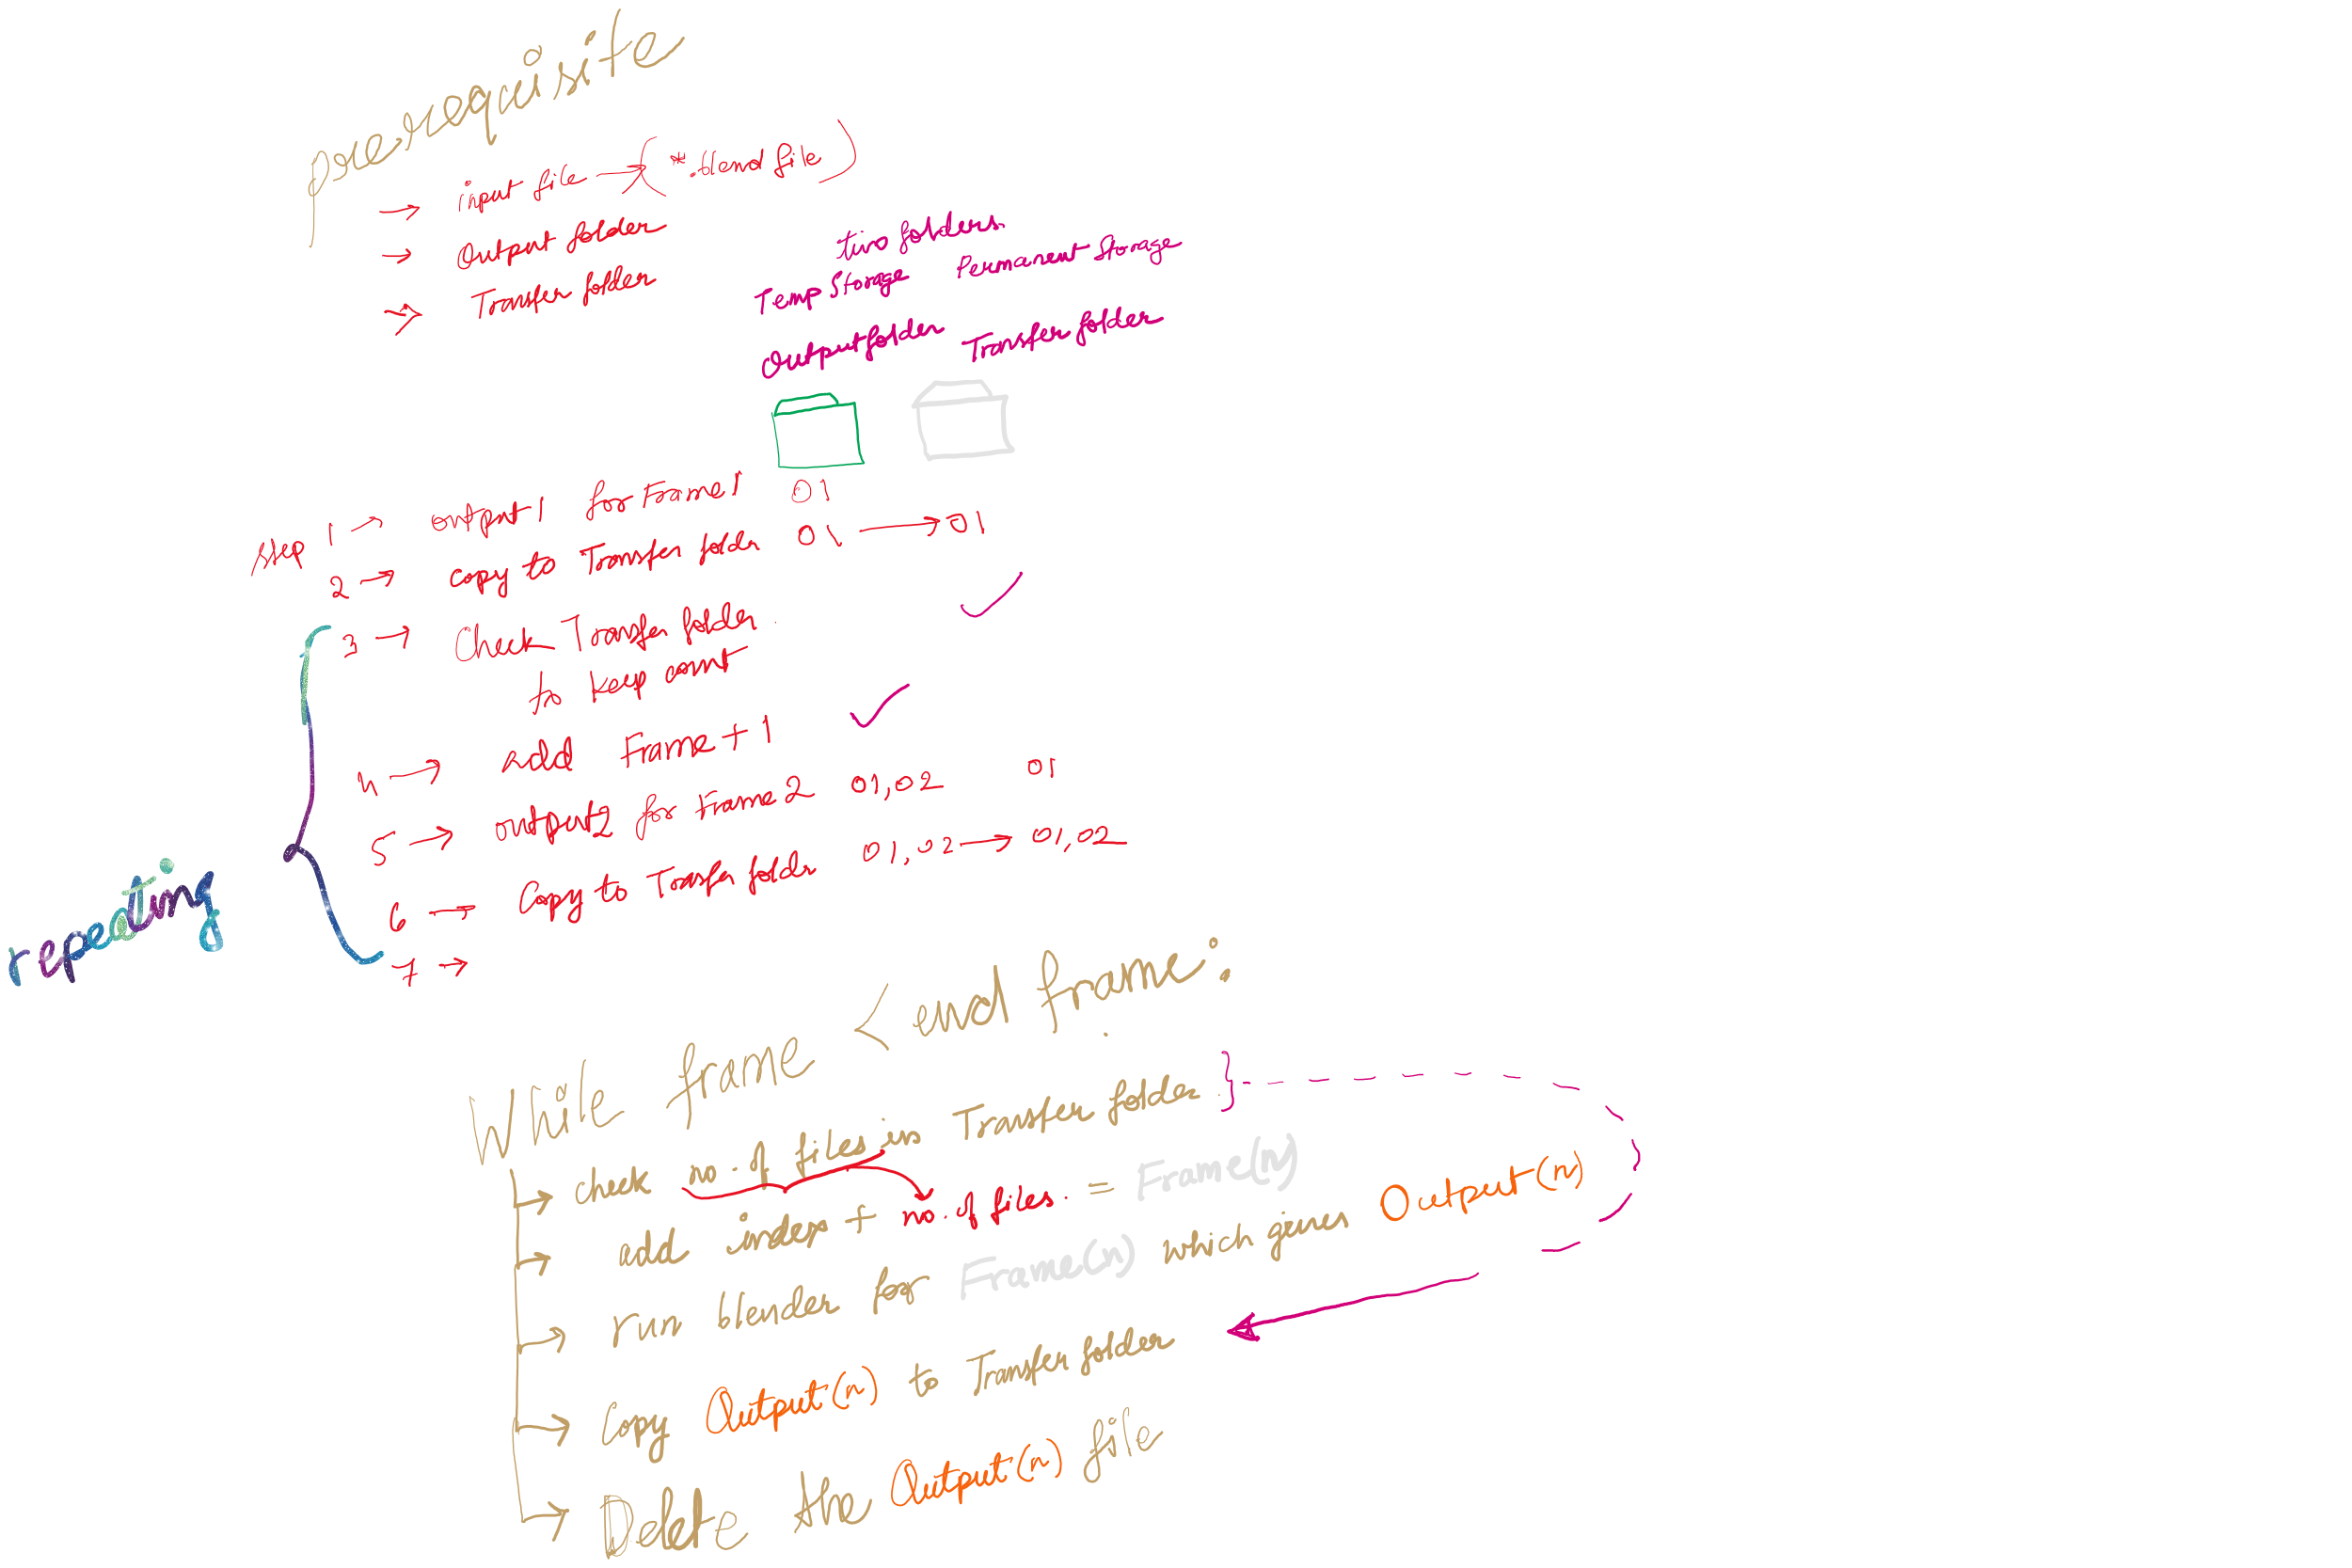

# ***EXIT SECTION***

## Disclaimer
The GPU used in Google Colab is specialized for data centres, neural network etc, not rendering 3D scenes. Because the computing power provided are free, the usage limits, idle timeouts and speed of the rendering may varies. [ColabPro](https://colab.research.google.com/signup) is available for those who wanted to have more powerful GPU and longer session for rendering. See the [FAQ](https://research.google.com/colaboratory/faq.html) for more info about this platform. In some cases, it might be faster to use an online Blender renderfarm.

## License
```
MIT License

Copyright (c) 2020 syn73

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```